In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Calcolo in corso...k={} done 2
k={} done 3
k={} done 4
k={} done 5
k={} done 6
k={} done 7
k={} done 8
k={} done 9
k={} done 10
k={} done 11
k={} done 12
k={} done 13
k={} done 14
k={} done 15
k={} done 16
k={} done 17
k={} done 18
k={} done 19
k={} done 20
 Fatto!


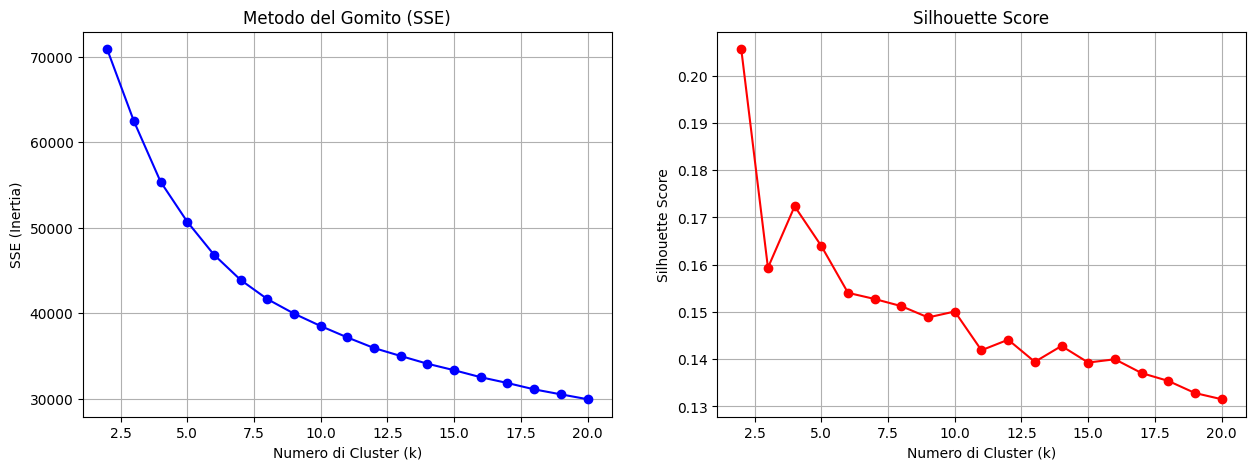

In [4]:
# 1. Caricamento e Preprocessing
ds = pd.read_json('tracks.json')
features_audio = [
    'bpm', 'loudness', 'pitch', 'spectral_complexity', 
    'rms', 'flatness', 'rolloff', 'flux'
]
X = ds[features_audio].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Loop per testare diversi k (da 2 a 10)
sse = []
silhouettes = []
k_range = range(2, 21)

print("Calcolo in corso...", end="")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))
    print("k={} done", k)
print(" Fatto!")

# 3. Visualizzazione Grafica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Grafico SSE (Elbow Method)
ax1.plot(k_range, sse, marker='o', color='blue')
ax1.set_title('Metodo del Gomito (SSE)')
ax1.set_xlabel('Numero di Cluster (k)')
ax1.set_ylabel('SSE (Inertia)')
ax1.grid(True)

# Grafico Silhouette Score
ax2.plot(k_range, silhouettes, marker='o', color='red')
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Numero di Cluster (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

plt.show()

In [5]:
# --- IMPOSTA QUI IL TUO K ---
n_clusters_scelto = 7
# ----------------------------

# 1. Clustering Finale
kmeans_final = KMeans(n_clusters=n_clusters_scelto, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(X_scaled)

# Aggiungiamo le etichette al dataset originale
ds.loc[X.index, 'cluster_label'] = labels

# 2. Metriche Finali
print(f"--- Risultati per k = {n_clusters_scelto} ---")
print(f"Silhouette Score Finale: {silhouette_score(X_scaled, labels):.3f}")

# 3. Profilazione dei Cluster (Medie delle feature)
profilo_cluster = ds.groupby('cluster_label')[features_audio].mean()
print("\n--- Profilo Medio dei Cluster ---")
display(profilo_cluster)

# 4. Esempi di canzoni per ogni gruppo
print("\n--- Esempi di canzoni per ogni Categoria ---")
for i in range(n_clusters_scelto):
    print(f"\n🔹 Categoria {i}:")
    esempi = ds[ds['cluster_label'] == i][['title', 'primary_artist']].head(3)
    print(esempi.to_string(index=False))

--- Risultati per k = 7 ---
Silhouette Score Finale: 0.153

--- Profilo Medio dei Cluster ---


,bpm,loudness,pitch,spectral_complexity,rms,flatness,rolloff,flux
cluster_label,,,,,,,,
0.0,114.554069,34.299743,2602.064666,28.493939,0.295219,0.885021,1282.185454,1.341657
1.0,105.740591,28.358519,2010.241154,37.683189,0.256960,0.835413,2227.178617,1.258659
2.0,95.817037,23.303819,2145.825501,26.929260,0.219764,0.906146,1358.292332,1.186817
3.0,147.774556,25.531173,2129.903308,29.366854,0.235833,0.887920,1517.812632,1.212901
4.0,107.758252,19.429137,2548.039561,22.314828,0.188216,0.859542,1836.589363,1.391687
5.0,116.584519,10.257848,2095.891495,15.910207,0.115246,0.866347,1459.373376,1.150996
6.0,109.197519,19.913296,2205.181309,25.458006,0.190042,0.264976,1768.383203,1.240854



--- Esempi di canzoni per ogni Categoria ---

🔹 Categoria 0:
               title primary_artist
        ​britney ;-)  Rosa Chemical
           NUOVI GAY  Rosa Chemical
PLAIN JANE Freestyle           Beba

🔹 Categoria 1:
 title primary_artist
 POLKA  Rosa Chemical
LONDRA  Rosa Chemical
 SLATT  Rosa Chemical

🔹 Categoria 2:
        title primary_artist
       BOHEME  Rosa Chemical
    TU MI FAI  Rosa Chemical
​fantasmi ;-(  Rosa Chemical

🔹 Categoria 3:
      title primary_artist
  LOBBY WAY  Rosa Chemical
ROSE & ROVI  Rosa Chemical
    POLKA 3  Rosa Chemical

🔹 Categoria 4:
       title primary_artist
​polka 2 :-/  Rosa Chemical
         CEO  Rosa Chemical
  Facciamolo  Rosa Chemical

🔹 Categoria 5:
                              title primary_artist
                        Acqua Panna  Rosa Chemical
                    PANTONE 17-3930  Rosa Chemical
Dovreicomprarmiunacollanacomeimigos  Rosa Chemical

🔹 Categoria 6:
             title primary_artist
 BRITISH PROV 2014  Rosa Chemical
CO

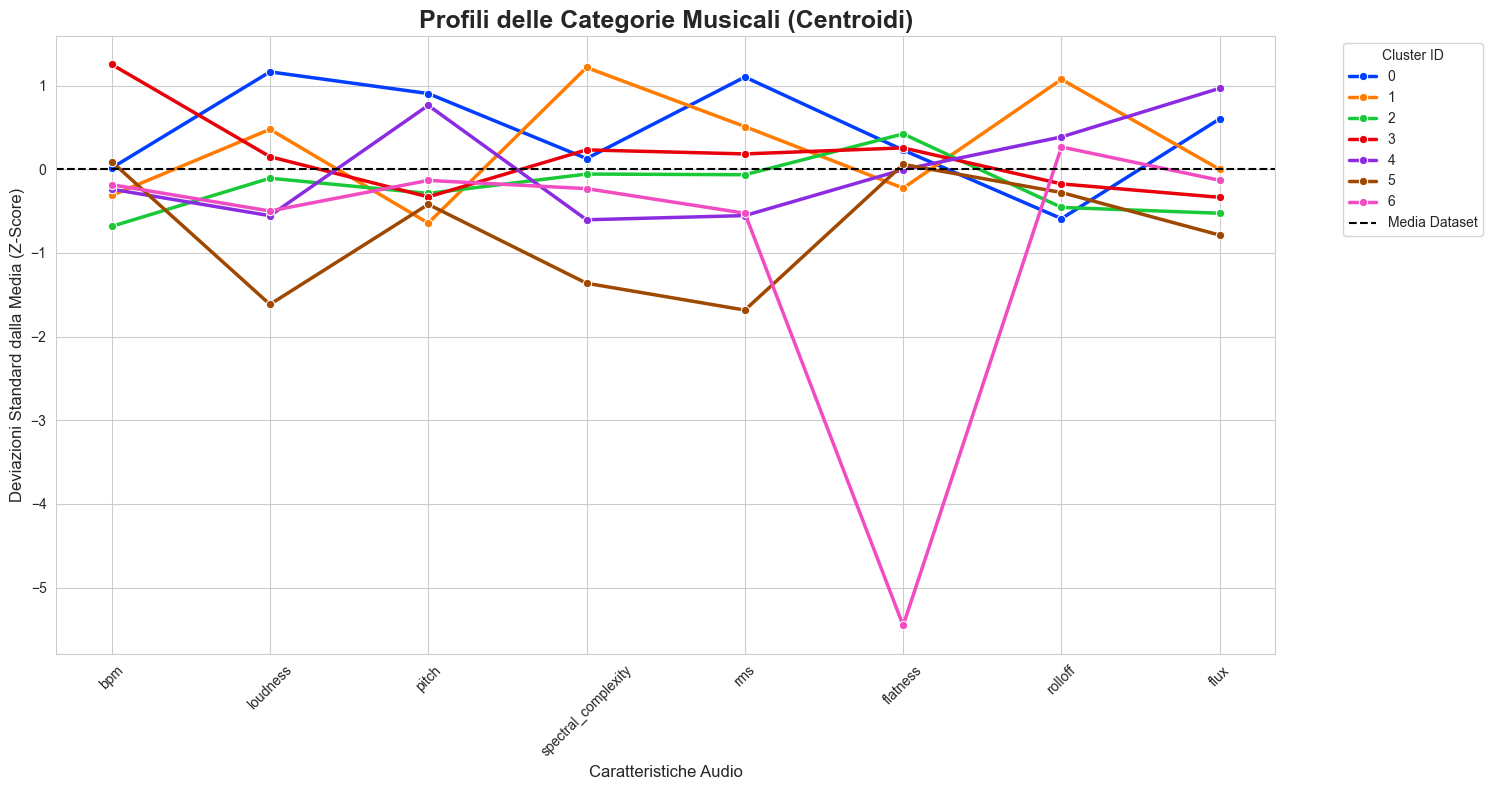

In [8]:
import seaborn as sns

X_scaled_df = pd.DataFrame(X_scaled, columns=features_audio)
X_scaled_df['cluster'] = labels

# 3. Calcolo dei Centroidi
centroids = X_scaled_df.groupby('cluster').mean().reset_index()

# --- PARTE CHIAVE: RISTRUTTURAZIONE DATI PER SEABORN ---
# Trasformiamo il dataframe da "largo" a "lungo" (Tidy Data)
# Ogni riga diventerà: [Cluster, Nome_Feature, Valore]
centroids_melted = pd.melt(
    centroids, 
    id_vars=['cluster'], 
    var_name='feature', 
    value_name='valore_z'
)

# 4. Visualizzazione con Seaborn
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid") # Griglia pulita

# Usiamo lineplot. 
# x = le features, y = i valori, hue = il cluster (colore diverso per linea)
sns.lineplot(
    data=centroids_melted, 
    x='feature', 
    y='valore_z', 
    hue='cluster', 
    palette='bright', # Colori accesi per distinguerli bene
    marker='o',       # Pallini sui punti per leggere meglio il valore esatto
    linewidth=2.5     # Linee un po' più spesse
)

# 5. Rifiniture Estetiche
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, label='Media Dataset') # Linea dello zero
plt.title('Profili delle Categorie Musicali (Centroidi)', fontsize=18, weight='bold')
plt.xlabel('Caratteristiche Audio', fontsize=12)
plt.ylabel('Deviazioni Standard dalla Media (Z-Score)', fontsize=12)
plt.xticks(rotation=45) # Ruota i nomi delle feature per leggerli meglio
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left') # Legenda fuori dal grafico

plt.tight_layout()
plt.show()